This notebook plays with the algorithm implemented [here](https://github.com/neutronimaging/scripts/blob/master/python/amglib/imageutils.py#L189) by Anders Kaestner.

In [107]:
from scipy import ndimage
import numpy as np
import copy

import matplotlib.pyplot as plt
%matplotlib notebook

from ipywidgets import widgets, interact

# create fake data set 

### setup 

In [134]:
image_width = 100
image_height = 100
nbr_gammas = 10
nbr_images = 5

gamma_offset = 100

In [135]:
list_images = []
random_image = np.random.rand(100, 100)
for index in np.arange(nbr_images):
    image = copy.deepcopy(random_image)
    rand_x = [np.random.randint(image_width) for _ in np.arange(nbr_gammas)]
    rand_y = [np.random.randint(image_height) for _ in np.arange(nbr_gammas)]
    for _x, _y in zip(rand_x, rand_y):
        image[_x, _y] = np.random.randint(50) + gamma_offset
    list_images.append(image)

list_images = np.array(list_images)

<IPython.core.display.Javascript object>


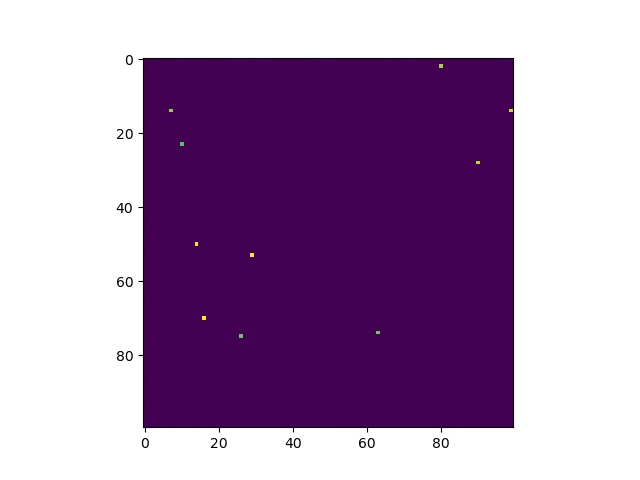

interactive(children=(IntSlider(value=0, description='index', max=4), Output()), _dom_classes=('widget-interac…

In [136]:
fig, ax = plt.subplots(1,1, num="Raw images")

def plot_images(index):
    ax1 = ax.imshow(list_images[index])

plot_ui = interact(plot_images,
                  index = widgets.IntSlider(min=0, max=(nbr_images-1)))

# Algorithm 

## Working with 1 image 

In [137]:
working_image = list_images[0]
size = 3

<IPython.core.display.Javascript object>


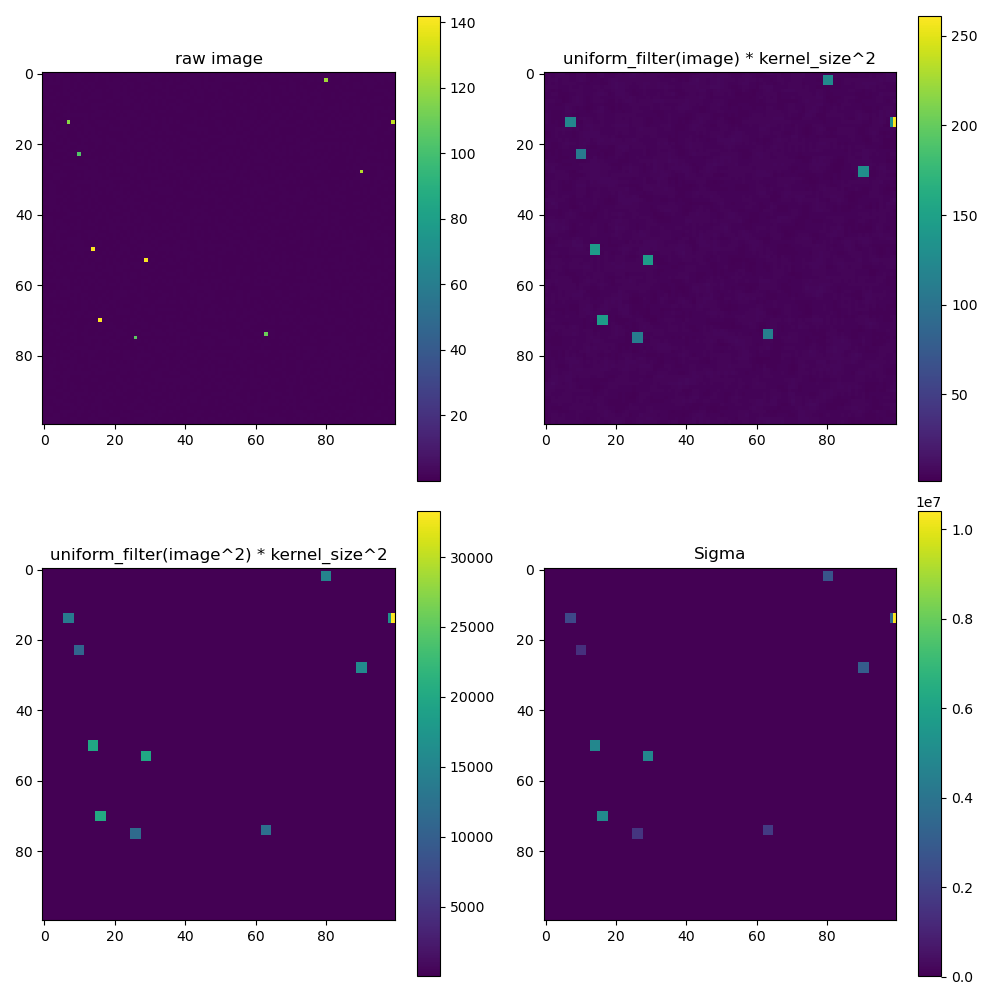

In [138]:
dims=working_image.shape
w=np.zeros(working_image.shape)
M=size**2

fig,ax = plt.subplots(2,2, figsize=(10,10))
ax = ax.ravel()

f=ndimage.uniform_filter(working_image, size=size)*M
f2=ndimage.uniform_filter(working_image**2, size=size)*M

sigma=(1/(M-1)*(f2-(f**2)/M))**2
w=1.0/sigma
a0=ax[0].imshow(working_image)
ax[0].set_title("raw image")
fig.colorbar(a0, ax=ax[0])

a1=ax[1].imshow(f)
ax[1].set_title("uniform_filter(image) * kernel_size^2")
fig.colorbar(a1, ax=ax[1])

a2=ax[2].imshow(f2)
ax[2].set_title("uniform_filter(image^2) * kernel_size^2")
fig.colorbar(a2, ax=ax[2])

a3=ax[3].imshow(sigma)
ax[3].set_title("Sigma")
fig.colorbar(a3, ax=ax[3])

plt.tight_layout()

## Working with n images 

In [139]:
def weightedaverageimage(imgs,size):
    """
    imgs: list of images
    size: bin size
    """
    dims=imgs.shape
    w=np.zeros(imgs.shape)
    M=size**2
    for i in np.arange(dims[0]) :
        f=ndimage.uniform_filter(imgs[i], size=size)*M
        f2=ndimage.uniform_filter(imgs[i]**2, size=size)*M
        
        sigma=(1/(M-1)*(f2-(f**2)/M))**2
        w[i]=1.0/sigma

    wsum=w.sum(axis=0)
    for i in np.arange(dims[0]) :
        w[i]=w[i]/wsum

    imgs=w*imgs
    img=imgs.sum(axis=0)
    
    return img

In [140]:
new_img_weighted = weightedaverageimage(list_images, 3)

<IPython.core.display.Javascript object>


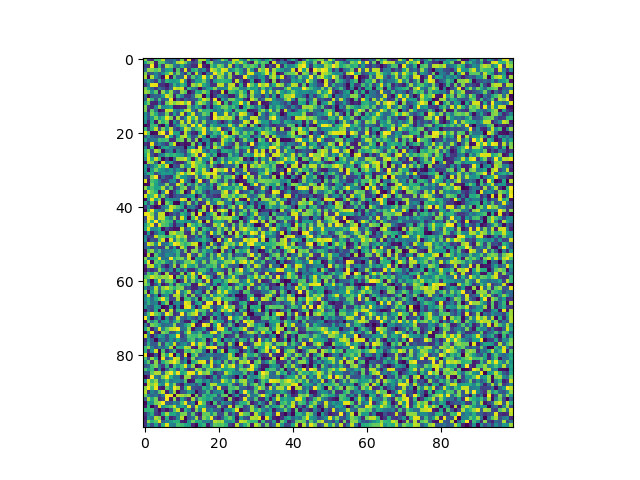

In [141]:
fig,ax = plt.subplots(1,1)
ax.imshow(new_img_weighted)

# Comparing results with mean and median 

In [142]:
def mean(imgs):
    return np.mean(imgs, axis=0)

In [143]:
new_img_mean = mean(list_images)

<IPython.core.display.Javascript object>


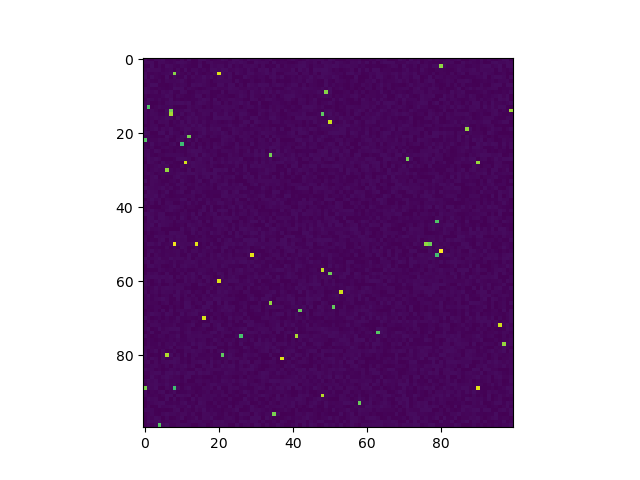

In [144]:
fig,ax = plt.subplots(1,1)
ax.imshow(new_img_mean)

In [145]:
def median(imgs):
    return np.median(imgs, axis=0)

new_img_median = median(list_images)

<IPython.core.display.Javascript object>


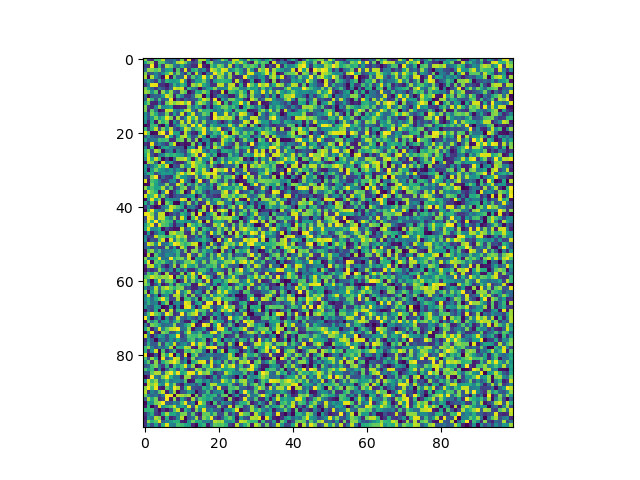

In [146]:
fig,ax = plt.subplots(1,1)
ax.imshow(new_img_median)

<IPython.core.display.Javascript object>


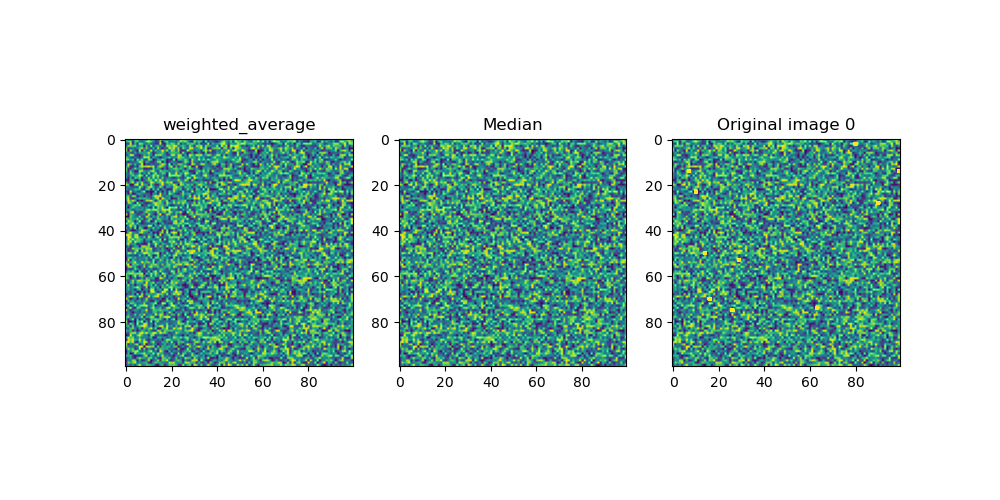

Text(0.5, 1.0, 'Original image 0')

In [147]:
fig,ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(new_img_weighted)
ax[0].set_title("weighted_average")

ax[1].imshow(new_img_median)
ax[1].set_title("Median")

ax[2].imshow(list_images[0], vmin=0, vmax=1)
ax[2].set_title("Original image 0")

## Compare profiles 

<IPython.core.display.Javascript object>


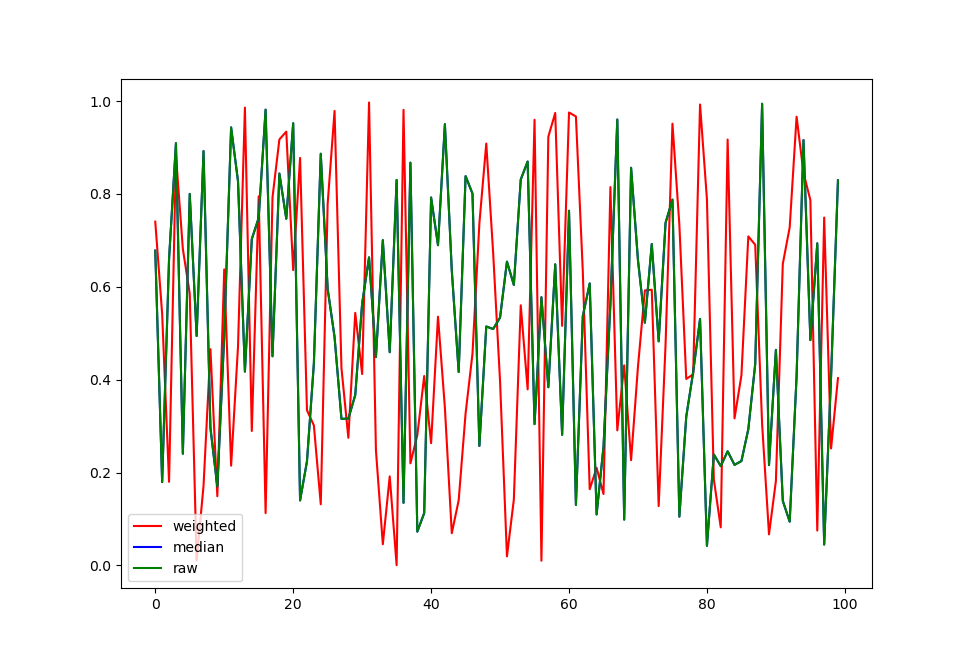

interactive(children=(IntSlider(value=0, description='y'), IntSlider(value=0, description='image_index', max=4…

In [150]:
fig, ax = plt.subplots(1,1, num="profiles")

def plot_profiles(y, image_index):
    
    plt.cla()
    profile_weighted_average = new_img[y, :]
    plt.plot(profile_weighted_average, 'r', label='weighted')
    
    profile_median = new_img_median[y, :]
    plt.plot(profile_median, 'b', label='median')
    
    profile_raw = list_images[image_index][y, :]
    plt.plot(profile_raw, 'g', label='raw')
    
    ax.legend()

plot_ui = interact(plot_profiles,
                  y = widgets.IntSlider(min=0, max=image_height),
                  image_index = widgets.IntSlider(min=0, max=nbr_images-1))

## direct comparisons of weighted and median

<IPython.core.display.Javascript object>


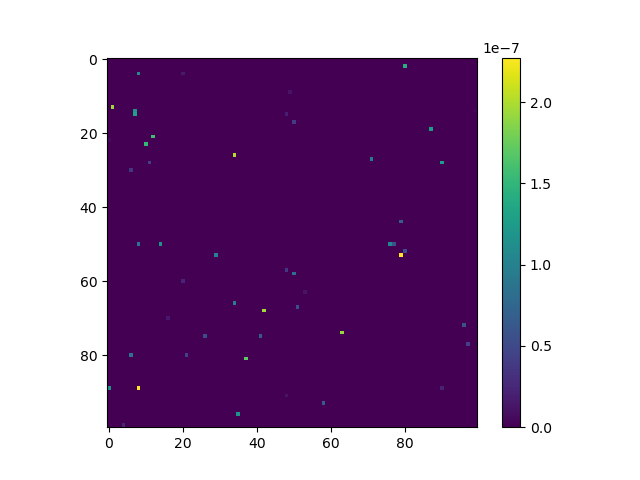

In [151]:
image_weighted_minus_median = new_img_weighted - new_img_median

fig,ax = plt.subplots(1,1)
a0 = ax.imshow(image_weighted_minus_median)
plt.colorbar(a0)